In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


# DATA CLEANSING

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [ ]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [ ]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Tidak ada data yang hilang

In [ ]:
df.drop(['id', 'date'], axis = 1, inplace=True)

#drop kolom id dan date

In [ ]:
df.head()
#cek data yang baru setelah di drop

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
#ubah kolom menjadi bilangan bulat
df['bathrooms'] = np.round(df['bathrooms'])
df['floors'] = np.round(df['floors'])

# EDA

Text(0.5, 1.0, 'Distribution of Price')

<Figure size 1000x500 with 0 Axes>

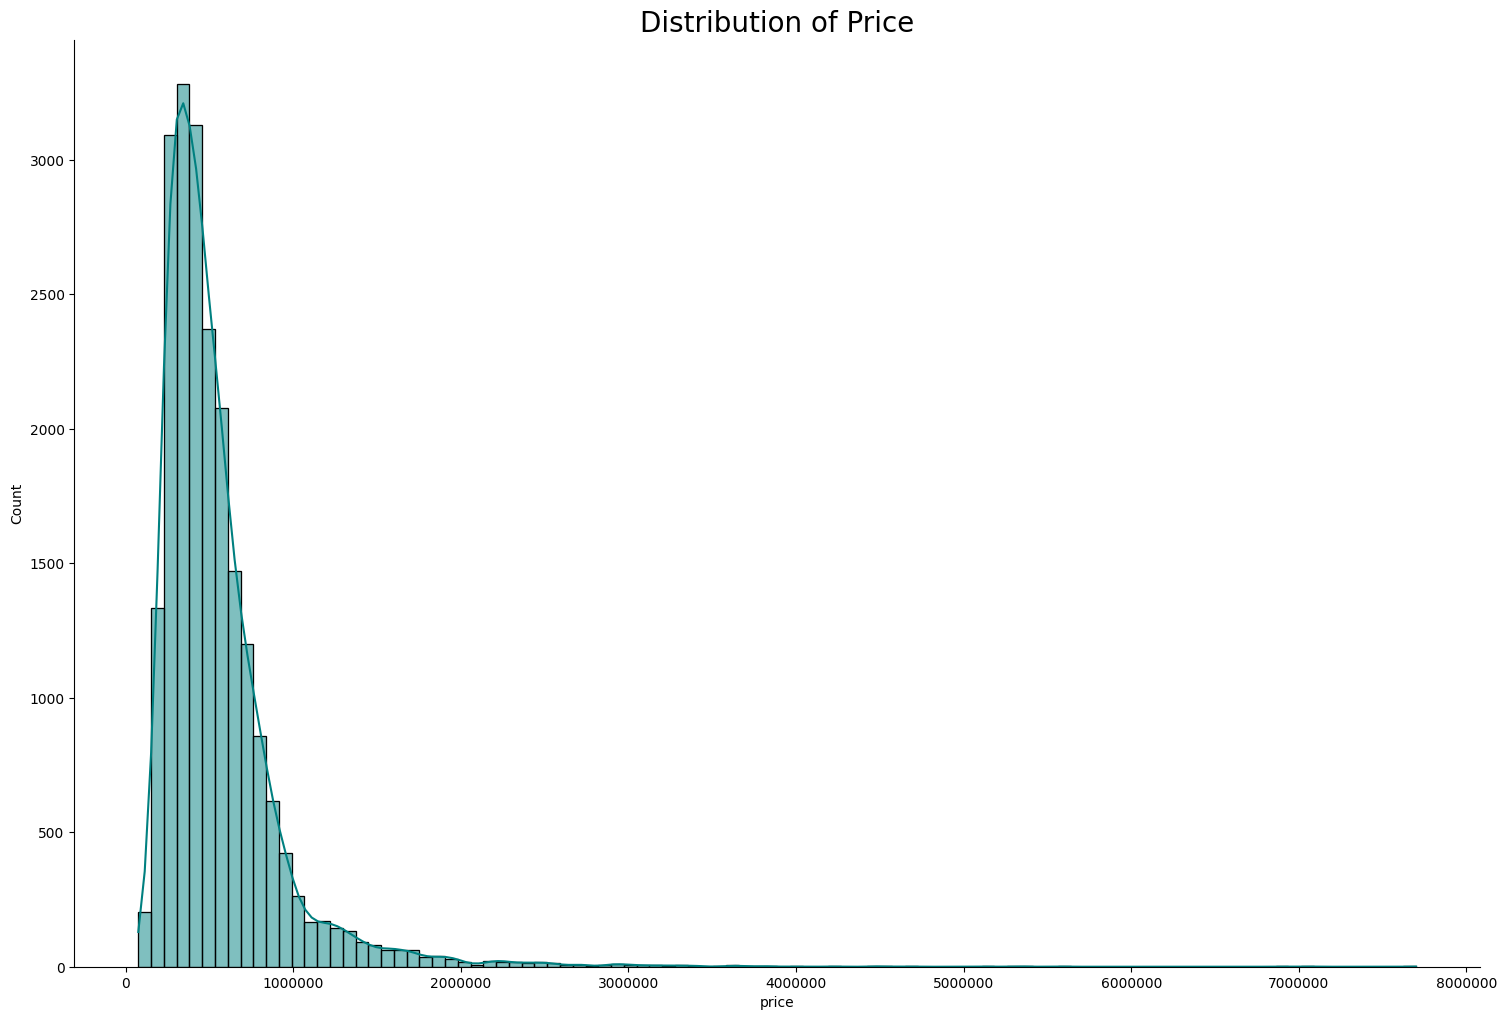

In [ ]:
plt.figure(figsize=(10, 5))
sns.displot(x='price', data=df, bins=100, kde=True, height=10, aspect=1.5, color='teal')
plt.ticklabel_format(style='plain', axis='x')
plt.title("Distribution of Price", fontsize=20)

Distribusi harga rumah miring ke kanan, yang menunjukkan bahwa ada lebih banyak rumah dengan harga lebih rendah dan lebih sedikit rumah dengan harga sangat tinggi

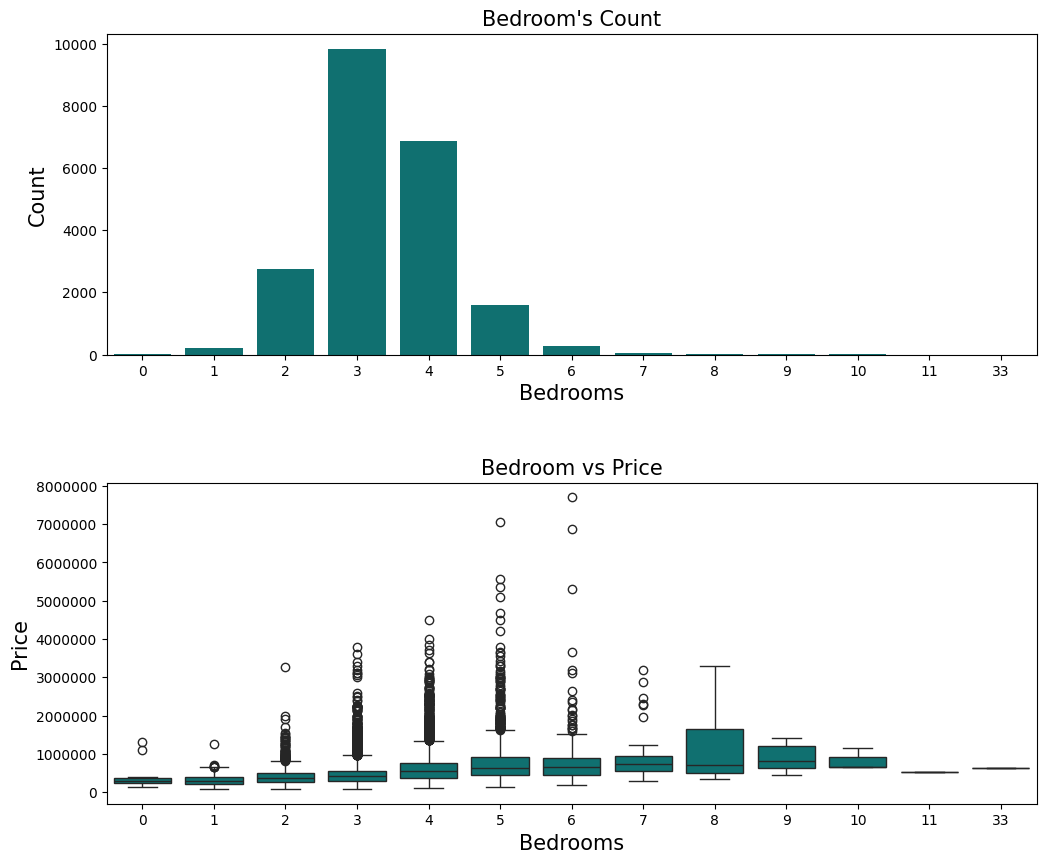

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.countplot(ax=ax[0], x='bedrooms', data=df, color='teal')
ax[0].set_xlabel('Bedrooms', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].set_title("Bedroom's Count", fontsize=15)

sns.boxplot(ax=ax[1], x='bedrooms', y='price', data=df, color='teal')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('Bedrooms', fontsize=15)
ax[1].set_ylabel('Price', fontsize=15)
ax[1].set_title("Bedroom vs Price", fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Dataset memiliki lebih banyak contoh rumah dengan 3 kamar tidur.
Rumah yang semakin banyak memiliki kamar tidur, harga rumah cenderung meningkat


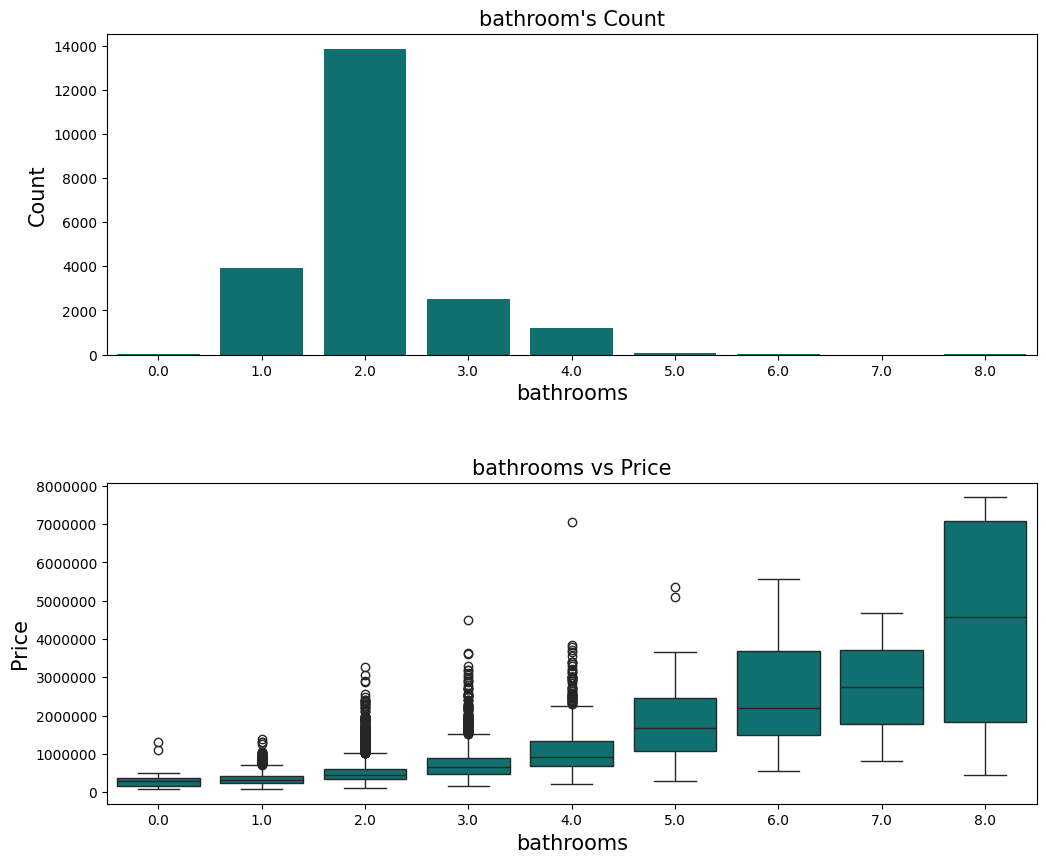

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.countplot(ax=ax[0], x='bathrooms', data=df, color='teal')
ax[0].set_xlabel('bathrooms', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].set_title("bathroom's Count", fontsize=15)

sns.boxplot(ax=ax[1], x='bathrooms', y='price', data=df, color='teal')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('bathrooms', fontsize=15)
ax[1].set_ylabel('Price', fontsize=15)
ax[1].set_title("bathrooms vs Price", fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Dataset memiliki lebih banyak contoh rumah yang memiliki 2,5 kamar mandi.

Rumah yang semakin banyak memiliki kamar mandi maka semakin tinggi juga harga rumah tersebut

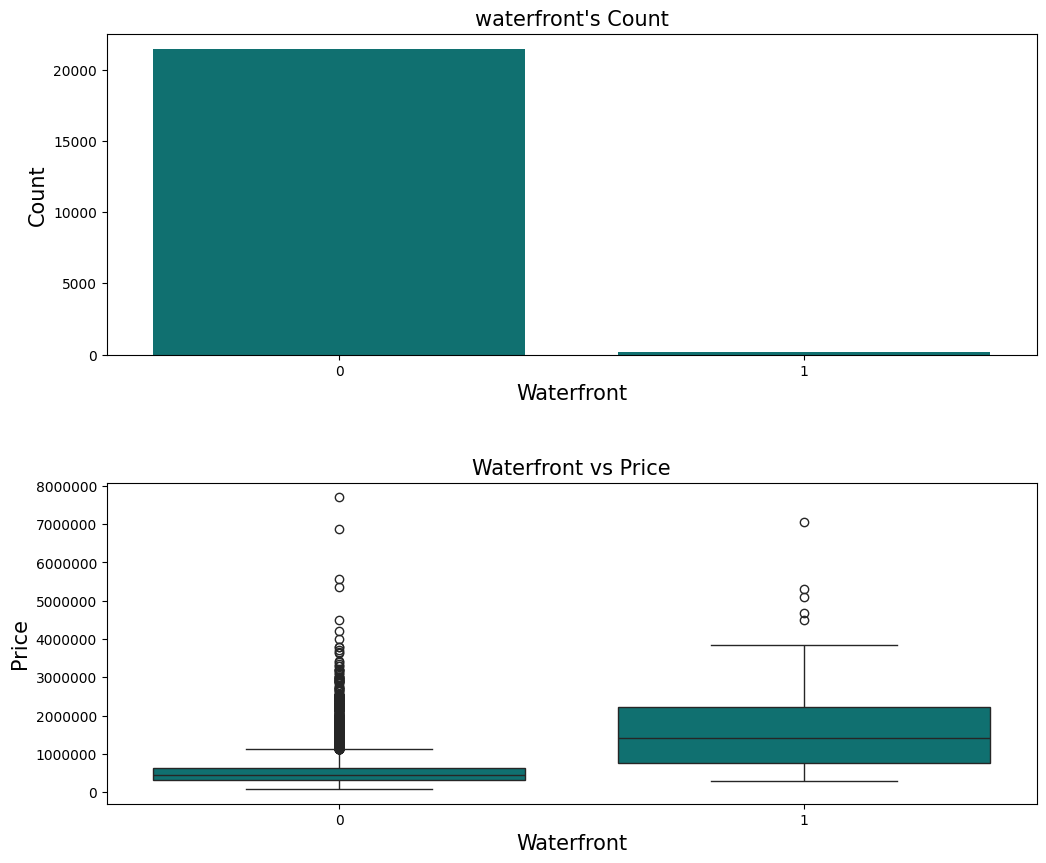

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.countplot(ax=ax[0], x='waterfront', data=df, color='teal')
ax[0].set_xlabel('Waterfront', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].set_title("waterfront's Count", fontsize=15)

sns.boxplot(ax=ax[1], x='waterfront', y='price', data=df, color='teal')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('Waterfront', fontsize=15)
ax[1].set_ylabel('Price', fontsize=15)
ax[1].set_title("Waterfront vs Price", fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

In [ ]:
df.waterfront.value_counts()

waterfront
0    21450
1      163
Name: count, dtype: int64

Dataset memiliki lebih banyak contoh rumah yang tidak memiliki water front.
rumah yang memiliki water front maka semakin tinggi juga harga rumah tersebut

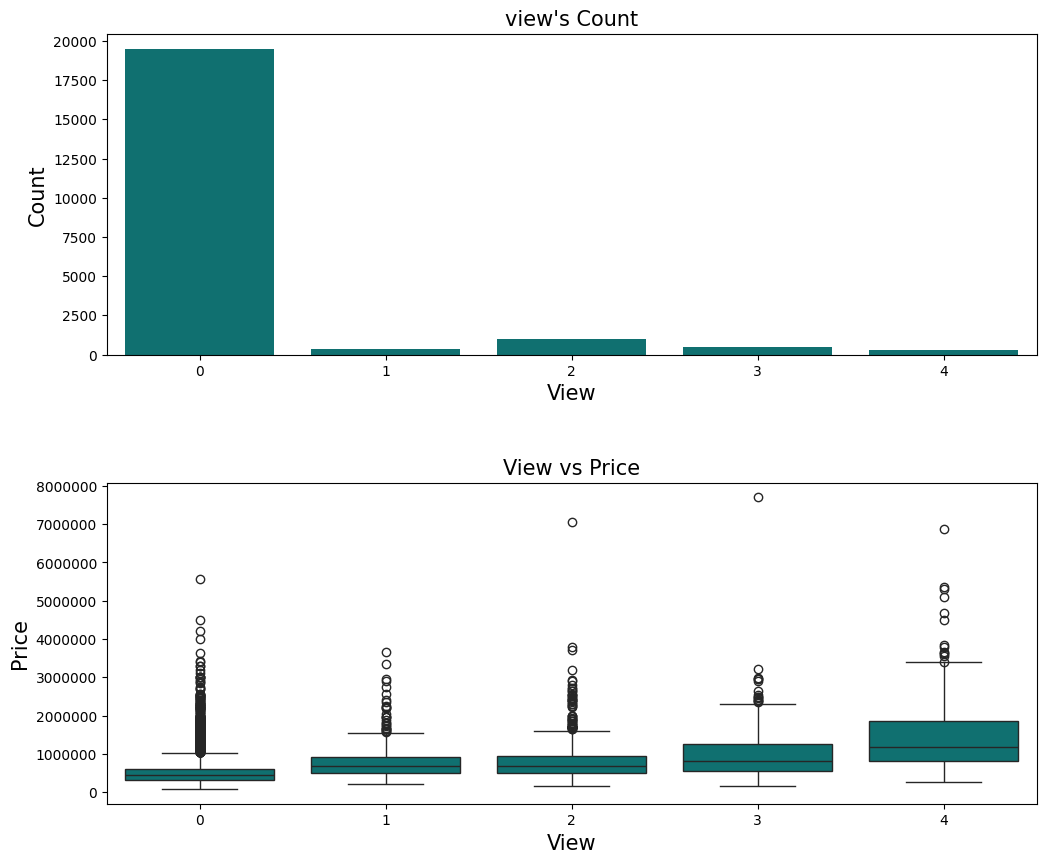

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.countplot(ax=ax[0], x='view', data=df, color='teal')
ax[0].set_xlabel('View', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].set_title("view's Count", fontsize=15)

sns.boxplot(ax=ax[1], x='view', y='price', data=df, color='teal')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('View', fontsize=15)
ax[1].set_ylabel('Price', fontsize=15)
ax[1].set_title("View vs Price", fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Dataset memiliki lebih banyak contoh rumah tanpa pemandangan.
Rumah yang memiliki pemandangan cenderung memiliki harga yang lebih tinggi

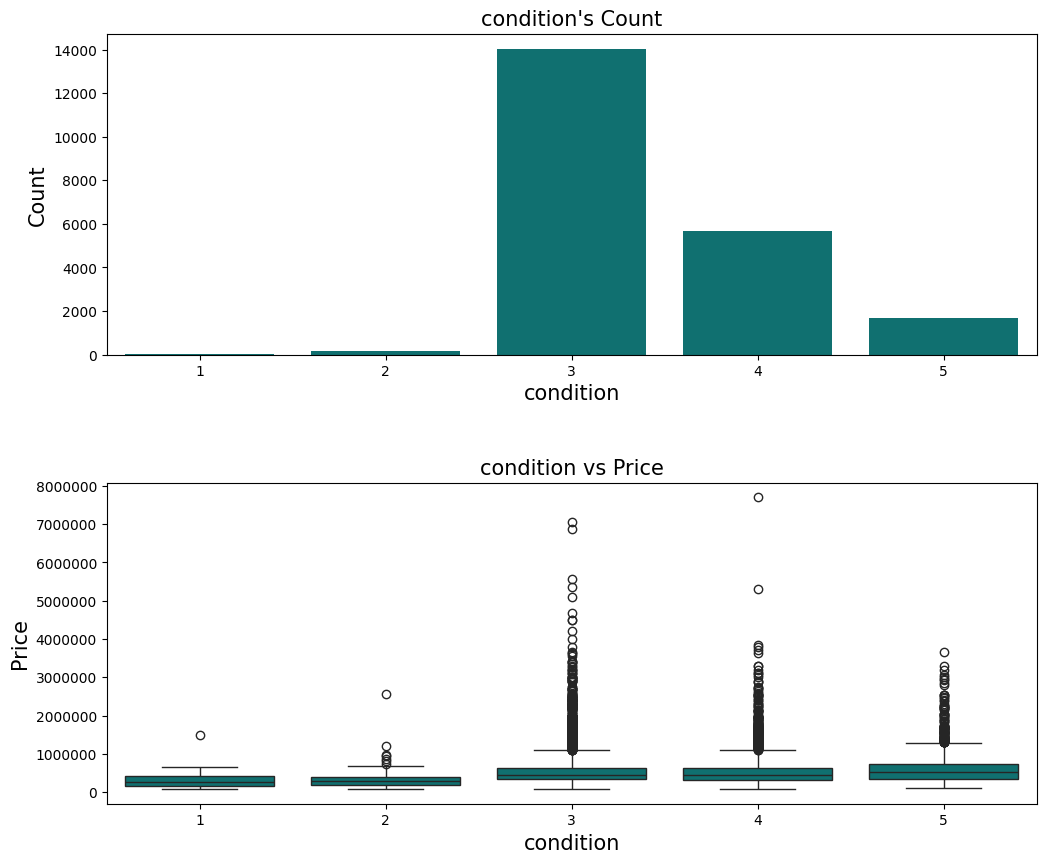

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.countplot(ax=ax[0], x='condition', data=df, color='teal')
ax[0].set_xlabel('condition', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].set_title("condition's Count", fontsize=15)

sns.boxplot(ax=ax[1], x='condition', y='price', data=df, color='teal')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('condition', fontsize=15)
ax[1].set_ylabel('Price', fontsize=15)
ax[1].set_title("condition vs Price", fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Dataset memiliki sebagian besar contoh rumah dengan kondisi nomor 3.
Kondisi rumah nomor 5 memiliki harga rata-rata yang lebih tinggi

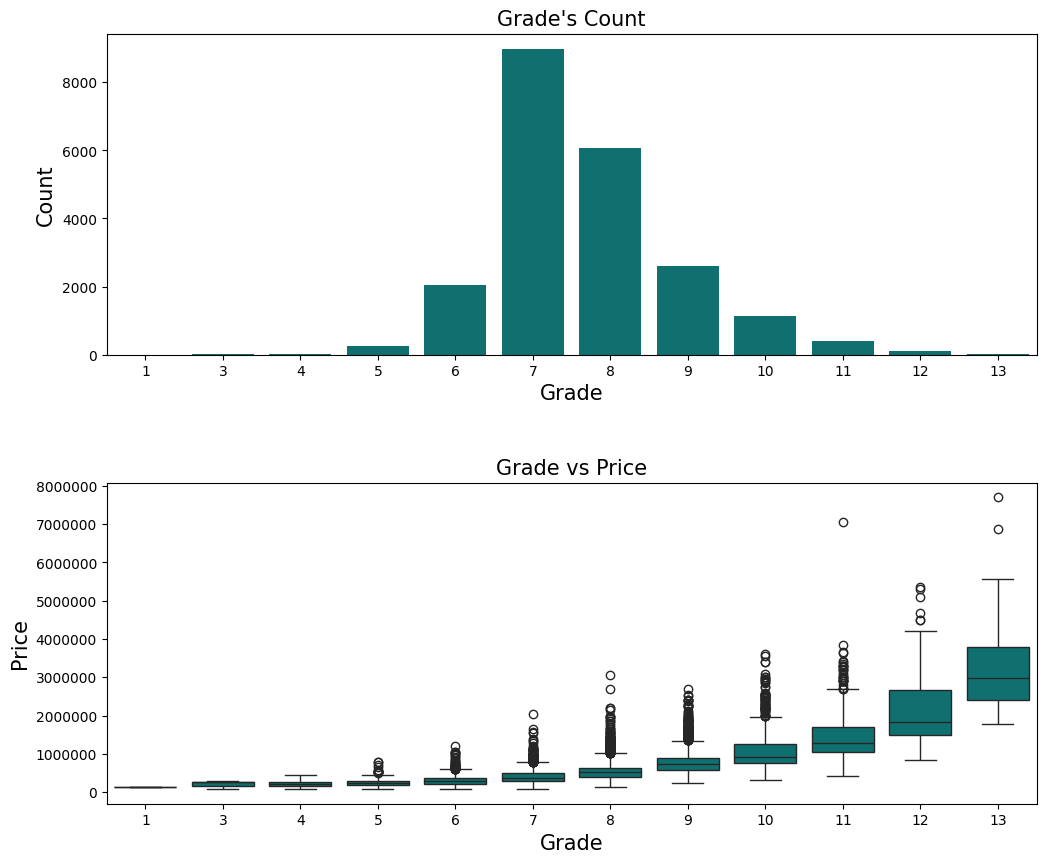

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

sns.countplot(ax=ax[0], x='grade', data=df, color='teal')
ax[0].set_xlabel('Grade', fontsize=15)
ax[0].set_ylabel('Count', fontsize=15)
ax[0].set_title("Grade's Count", fontsize=15)

sns.boxplot(ax=ax[1], x='grade', y='price', data=df, color='teal')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_xlabel('Grade', fontsize=15)
ax[1].set_ylabel('Price', fontsize=15)
ax[1].set_title("Grade vs Price", fontsize=15)

plt.subplots_adjust(wspace=0.4, hspace=0.4)

Dalam dataset, sebagian besar rumah memiliki peringkat 7.
Harga rumah cenderung meningkat ketika peringkat juga meningkat

In [ ]:
#korelasi fitur terhadap variabel target harga
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.518912
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.244906
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
zipcode         -0.053203
Name: price, dtype: float64

<Axes: >

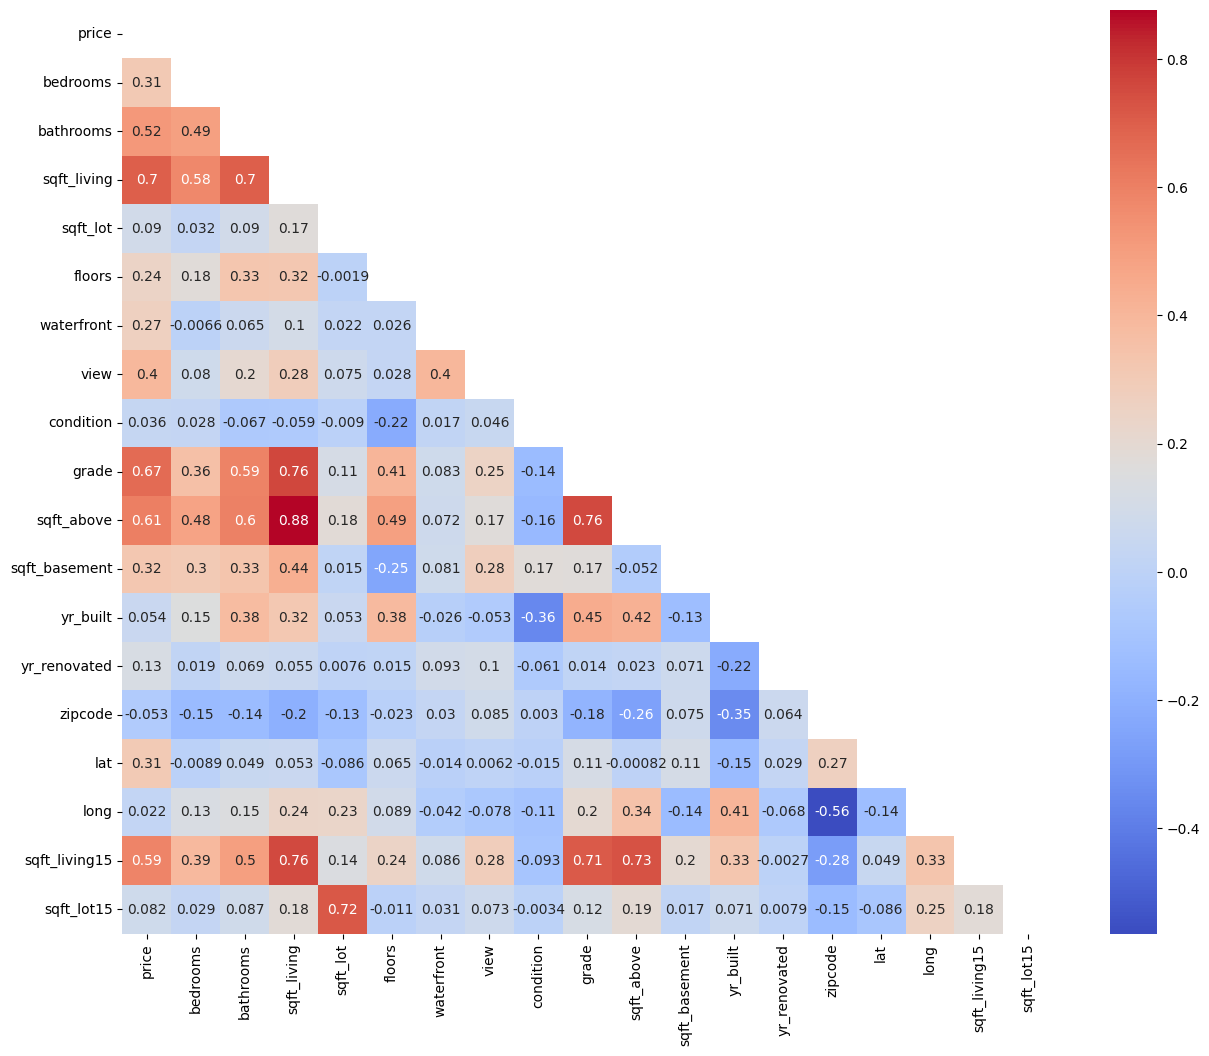

In [ ]:
matrix = np.triu(df.corr())
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', mask=matrix)

CREATING MODELS

In [ ]:
X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
       'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].values
y = df['price'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)

RandomForestRegressor(n_estimators=200)

In [ ]:
score_rfr = rfr.score(X_train,y_train)
prev_rfr = rfr.predict(X_test)
mae_rfr = mean_absolute_error(y_test,prev_rfr)
mse_rfr = mean_squared_error(y_test,prev_rfr)
rmse_rfr = np.sqrt(mse_rfr)

print('Score: ',score_rfr)
print('Mae: ',mae_rfr)
print('Mse: ',mse_rfr)
print('Rmse: ',rmse_rfr)

Score:  0.9601876604152288
Mae:  127528.32625229197
Mse:  39202724707.01109
Rmse:  197996.77953696897


In [ ]:
preco_rfr = df['price']
predict_rfr = pd.Series(prev_rfr)
error_rfr = preco_rfr-predict_rfr
data_rfr = {'Price':preco_rfr,'Predictions':predict_rfr,'Error':error_rfr}
data_prev_rfr = pd.DataFrame(data_rfr)
data_prev_rfr.head()

,Price,Predictions,Error
0,221900.0,495623.740,-273723.740
1,538000.0,301966.810,236033.190
2,180000.0,492269.805,-312269.805
3,604000.0,562131.370,41868.630
4,510000.0,438160.295,71839.705


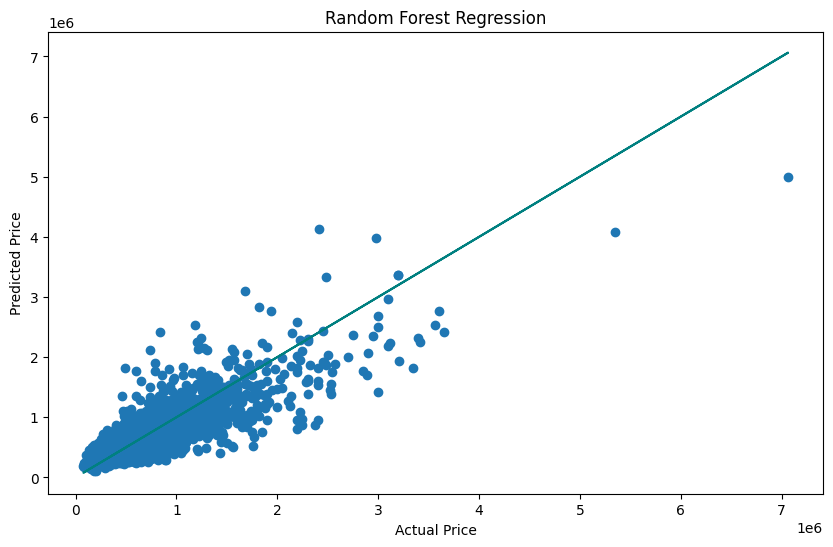

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,prev_rfr)
plt.plot(y_test,y_test,color='teal')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regression')
plt.show()

Sebagian besar titik dekat dengan garis yang menunjukkan bahwa model random forest sebagai model yang baik dalam memprediksi harga